In [519]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [520]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-01-21 17:00:37--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-01-21 17:00:37 (3.90 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [521]:
# types cast
datafr = dataset.convert_dtypes()

# categorical to numeric --> {female : 0 , male : 1}
datafr['sex'] = pd.factorize(datafr['sex'])[0]

# categorical to numeric --> {smoker : 0 , non-smoker : 1}
#datafr['smoker'] = pd.factorize(datafr['smoker'])[0]
datafr['smoker'] = datafr['smoker'].map({'no': 0, 'yes': 1})

# categorical to numeric --> {northwest : 2 , northeast : 3, southeast : 1, southwest : 0}
datafr['region'] = pd.factorize(datafr['region'])[0]


In [522]:
# simple regression with age ? multiple regression ?
#datafr = datafr[['age','expenses']]
datafr

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,2,10600.55
1334,18,0,31.9,0,0,3,2205.98
1335,18,0,36.9,0,0,1,1629.83
1336,21,0,25.8,0,0,0,2007.95


In [523]:
# train/test data split

datafr_train_dataset = datafr.sample(frac=0.8, random_state=0)
datafr_test_dataset = datafr.drop(datafr_train_dataset.index)
#print(test_dataset)
#print(train_dataset)

datafr_train_labels = datafr_train_dataset.pop('expenses')
datafr_test_labels = datafr_test_dataset.pop('expenses')

#print(datafr_test_dataset)
#print(datafr_train_dataset)

#print(datafr_train_labels)
#print(datafr_test_labels)


In [524]:
# pandas to numpy array conversion

datafr_train_dataset_2 = datafr_train_dataset.convert_dtypes()
datafr_test_dataset_2 = datafr_test_dataset.convert_dtypes()
#print(train_dataset)
#print(test_dataset)

datafr_train_labels_2 = datafr_train_labels.convert_dtypes()
datafr_test_labels_2 = datafr_test_labels.convert_dtypes()
#print(train_labels)
#print(test_labels)

train_dataset = np.array(datafr_train_dataset_2.values.tolist())
test_dataset = np.array(datafr_test_dataset_2.values.tolist())
#print(train_dataset)
#print(test_dataset)

train_labels = np.array(datafr_train_labels_2.tolist())
test_labels = np.array(datafr_test_labels_2.tolist())
#print(train_labels)
#print(test_labels)


In [525]:
# model

model = tf.keras.Sequential([layers.Dense(64,activation='relu', input_shape=[6]),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mae', metrics=['mae','mse'])
#model.summary()

history = model.fit(train_dataset, train_labels, epochs=100, validation_split = 0.2, callbacks=[keras.callbacks.EarlyStopping(monitor='mae', patience=10), tfdocs.modeling.EpochDots()])


Epoch 1/100
19/27 [====================>.........] - ETA: 0s - loss: 8893.0244 - mae: 8893.0244 - mse: 190990768.0000   
Epoch: 0, loss:8200.1406,  mae:8200.1406,  mse:171363408.0000,  val_loss:8207.2998,  val_mae:8207.2998,  val_mse:201437504.0000,  
27/27 [==============================] - 1s 10ms/step - loss: 8200.1406 - mae: 8200.1406 - mse: 171363408.0000 - val_loss: 8207.2998 - val_mae: 8207.2998 - val_mse: 201437504.0000
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 6577.1392 - mae: 6577.1392 - mse: 145501536.0000 - val_loss: 7052.2559 - val_mae: 7052.2559 - val_mse: 185036384.0000
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 5978.7241 - mae: 5978.7241 - mse: 137467344.0000 - val_loss: 7231.8008 - val_mae: 7231.8008 - val_mse: 181344816.0000
Epoch 4/100
27/27 [==============================] - 0s 9ms/step - loss: 5715.9839 - mae: 5715.9839 - mse: 117114392.0000 - val_loss: 5675.7065 - val_mae: 5675.7065 - val_mse: 122442648.

Text(0, 0.5, 'Expenses error')

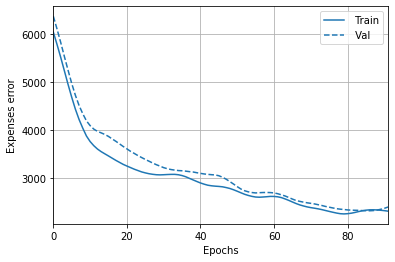

In [526]:
# history plot
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'': history}, metric = 'mae')
plt.ylabel('Expenses error')

9/9 - 0s - loss: 3456.5007 - mae: 3456.5007 - mse: 40784392.0000 - 30ms/epoch - 3ms/step
Testing set Mean Abs Error: 3456.50 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


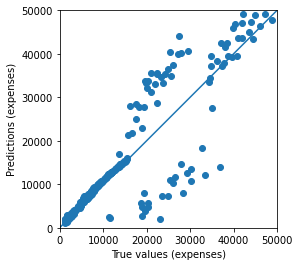

In [527]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
